In [16]:
%load_ext autoreload
%autoreload 2


import Benchmark.benchmark as bm
import Benchmark.run as bm_single
import Benchmark.run_ensemble as bm_ensemble

scrape = bm.TraceScrape()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

## Data Collection

The below cell collects the opentelemetry data, either by collecting all trace data in the last `x` minutes or by loading previously saved json data.

In [17]:
scrape.scrape(5)
#scrape.save()
#scrape.load()

Obtaining Run from nexus-writer
  Response received. Processing json
Obtaining Frame from digitiser-aggregator
  Response received. Processing json
Obtaining process_kafka_message from nexus-writer
  Response received. Processing json
Obtaining process_digitiser_event_list_message from digitiser-aggregator
  Response received. Processing json
Obtaining process_frame_assembled_event_list_message from trace-to-events
  Response received. Processing json
Obtaining run_configured_simulation from simulator
  Response received. Processing json


In [18]:
scrape.make_trace_banks()
runs = scrape.get_last_n_runs(1)

{'duration': 1,
 'logs': [],
 'operationName': 'existing frame found',
 'processID': 'p2',
 'references': [{'refType': 'CHILD_OF',
                 'spanID': '97be637c11e9de6f',
                 'traceID': '7eb4199dd1fdd9c1cab4a1319060ed4f'},
                {'refType': 'FOLLOWS_FROM',
                 'spanID': 'c395c5c82535a614',
                 'traceID': '8a1cf9619fab2038745e5b910d039fcf'}],
 'spanID': '120937178ff55d9b',
 'startTime': 1723472681277108,
 'tags': [{'key': 'otel.library.name',
           'type': 'string',
           'value': 'opentelemetry-otlp'},
          {'key': 'otel.library.version', 'type': 'string', 'value': '0.15.0'},
          {'key': 'code.filepath',
           'type': 'string',
           'value': 'digitiser-aggregator/src/frame/cache.rs'},
          {'key': 'code.namespace',
           'type': 'string',
           'value': 'digitiser_aggregator::frame::cache'},
          {'key': 'code.lineno', 'type': 'int64', 'value': 53},
          {'key': 'thread.id',

Exception: Hero trace not found

## Single Run
The following cells operate on a single run

### Event Formation

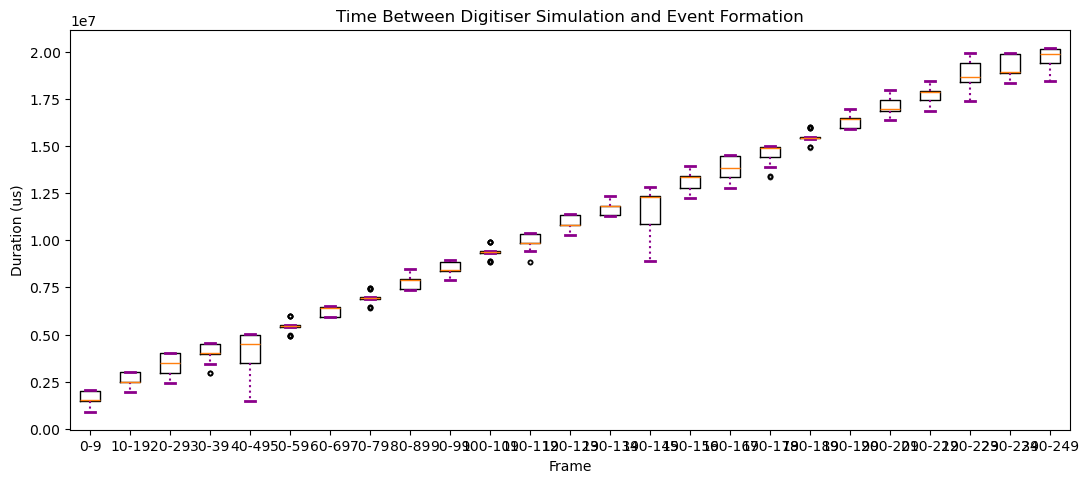

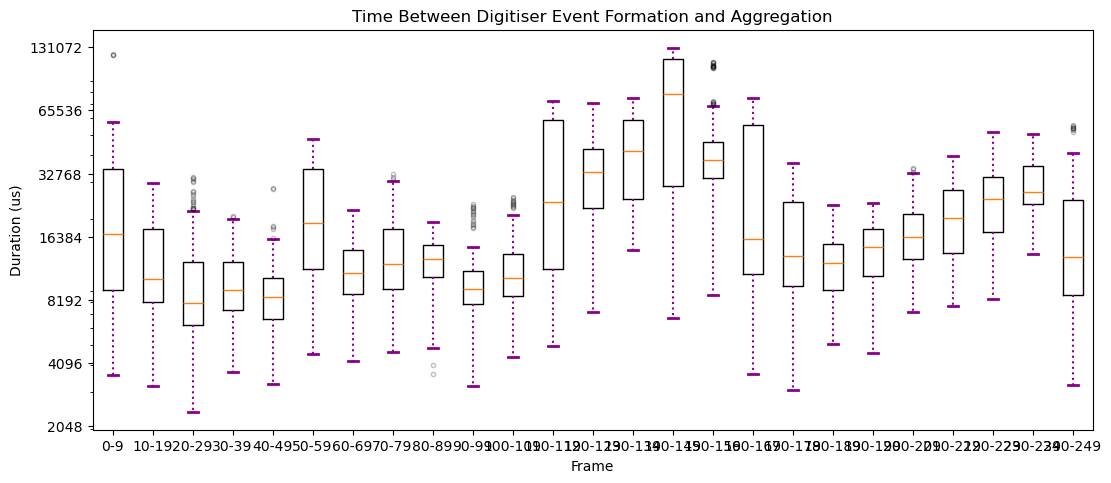

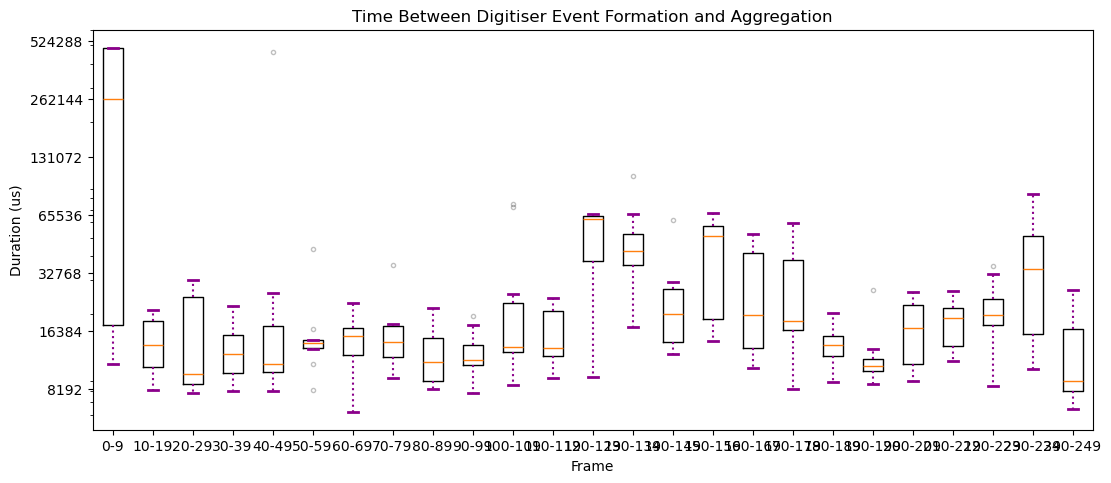

In [15]:
import matplotlib.pyplot as plt
run = runs[0]
figure = plt.figure(figsize = (10,4))
bm_single.plot_digitiser_time_to_event_formation_by_frame(run, figure, [0,0,1,1], 10)
figure = plt.figure(figsize = (10,4))
bm_single.plot_digitiser_time_to_aggregator_by_frame(run, figure, [0,0,1,1], 10)
figure = plt.figure(figsize = (10,4))
bm_single.plot_frame_time_to_writer_by_frame(run, figure, [0,0,1,1], 10)
#bm_single.plot_channel_lifetimes_by_frame(run)

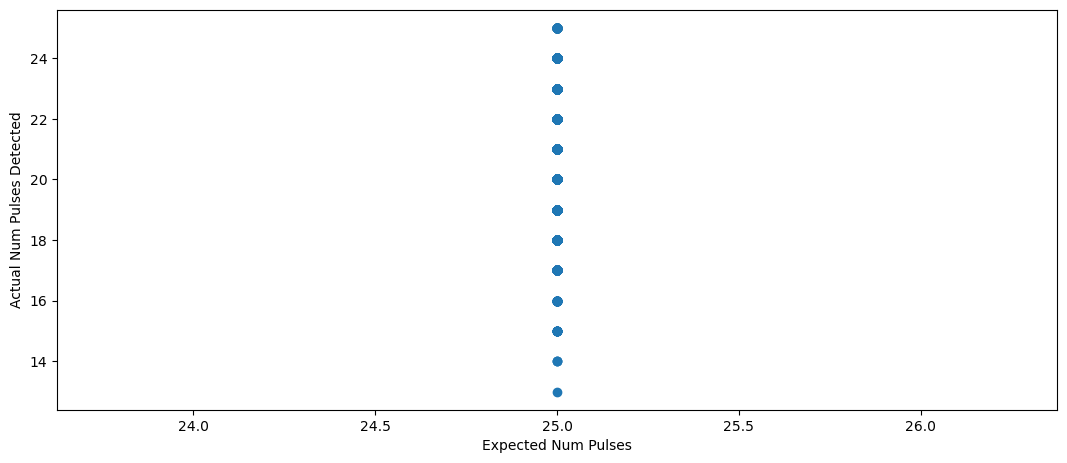

In [18]:
run = runs[0]
bm_single.plot_pulse_detections(run)
bm_single.plot_pulse_correlations(run)

## Experiemental Widget

In [ ]:
import ipywidgets as widget

def square(frame):
    for run in runs:
        bm_single.plot_timing_correlations(run, frame)

interact = widget.interactive(square, frame = (0,149))
display(interact)


## Run Ensemble
The below cells plot timing data across multiple runs which differ in the number of digitisers present

### Event Formation

In [ ]:
bm_ensemble.plot_channel_lifetimes_by_digitiser_count(runs)

### Frame Aggregation

In [ ]:
#bm_ensemble.plot_aggregator_frame_lifetimes(runs)
#bm_ensemble.plot_aggregator_frame_digitiser_range(runs)
#bm_ensemble.plot_aggregator_producer_times(runs)
bm_ensemble.plot_aggregator_frame_all_three(runs)
bm_ensemble.plot_nexus_writer_frame_time(runs)

### Run File Writing

In [ ]:
bm_ensemble.plot_aggregator_frame_times_over_time(runs)